## Data Fundamentals (H)
# Week 4: Computational Linear Algebra I 
## Supplement: homogenous coordinates
----
 ##### DF(H) - University of Glasgow - John H. Williamson - 2017

In [1]:
# standard imports
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize=(10.0, 6.0), dpi=140)
from jhwutils.matrices import show_matrix_effect, print_matrix


### Outer products
The **outer product** of two vectors $\vec{x}$ and $\vec{y}$ is a matrix:
$$\vec{x} \otimes \vec{y} = \begin{bmatrix}
x_1 y_1 & x_1 y_2 & \dots & x_1 y_m \\
x_2 y_1 & x_2 y_2 & \dots & x_2 y_m \\
\dots\\
x_n y_1 & x_n y_2 & \dots & x_n y_m \\
\end{bmatrix}$$

It includes *every* possible product of elements from $\vec{x}$ and $\vec{y}$, and is defined for vectors which can be of different lengths (above $\vec{x}$ is of length $n$ and $\vec{y}$ is of length $m$)

The element of the outer product matrix $A=\vec{x}\otimes\vec{y}$ are: $A_{ij} = x_i  y_j$ 

In [ ]:
x = np.array([1,2,3,4])
y = np.array([1,2,3])
# outer product of two vectors of length m and n is a matrix m x n
print_matrix("x \otimes y", np.outer(x,y))  

### Cross products
The cross product is a special operation which is only defined for dimension 3 vectors, and takes two vectors, returning a third which is at 90 degrees (orthogonal) to the first two. (actually, the cross product is defined in seven dimensions as well -- I've never seen this used).

It is written $\vec{x} \times \vec{y}$

This is an extremely important operation in 3D geometry.

### Triangle example
For example, if you have a triangle defined by 3 vectors in 3D, $\vec{a}, \vec{b}, \vec{c}$:

    a [0,0,1]
    b [0,1,0]
    c [1,1,0]

Then the direction which points "out" from the triangle (the **surface normal**) is:
$$\vec{n} = (\vec{a_n}-\vec{b_n}) \times (\vec{b_n}-\vec{c_n}),$$ where $a_n = \frac{a}{||a||}$, the normalised form of $a$.
<img src="imgs/cross_product.png">

In [ ]:
a = np.array([0,0,1])
b = np.array([0,1,0])
c = np.array([1,1,0])

normal = np.cross(a-b, b-(c)/np.linalg.norm(c))
print(normal)

#### Homogeneous coordinates
There is one kind of "rigid" transformation that we can't express as a matrix: a **translation**, that is a *shifting* of points. This can never be expressed as a matrix, because we know that the origin will never move under a linear map.
$$ \newcommand{\vec}[1]{ {\bf #1} } $$
$$A\vec{0} = \vec{0}$$

We can apply a translation to a vector using vector addition. The form:
$$A\vec{x} + \vec{b}$$
allows for both linear maps (defined by $A$) and for translations (defined by the vector $\vec{b}$).

However, it is often convenient to be able to do all operations with matrix multiplies. This is true in graphics engines, for example, or in neural network libraries. This avoids the awkward extra step of adding on a vector to perform translations. The solution is to use **homogenous coordinates**. 

We expand our matrix $A$, adding on one extra row to the bottom and one extra column to the right to produce $A^\prime$. The bottom row of $A$ is all zeros except for a 1 in the rightmost position. The translation of the vector to be applied is placed in the rightmost position. 

So if we originally had a matrix
$$A=\begin{bmatrix}
2 & 0 \\
0 & 0.5 \\
\end{bmatrix}$$ (which just scales the first coordinate by 2 and the second by 0.5)
we would convert it to:


$$A^\prime = \begin{bmatrix}
2 & 0 & x\\
0 & 0.5 & y\\
0 & 0 & 1 \\
\end{bmatrix},$$
where $x$ and $y$ were the offsets (translations) we wanted to apply.

Then, instead of the product $Ax$, we compute $A^\prime \vec{x^\prime},$ where
$\vec{x^\prime}$ is just the vector $\vec{x}$ with a 1 appended to it.

We then discard the last component of the result.


In [12]:
A = np.array([[2,0], [0, 0.5]])
b = np.array([-0.5, 0.25])


def homogenize(A, b):
    ## homogenous version
    # pad the bottom
    Ap = np.zeros((A.shape[0]+1, A.shape[1]+1))
    Ap[:A.shape[0], :A.shape[1]] = A    
    # put b in the rightmost column
    Ap[:-1,-1] = b
    # set the bottom right to 1
    Ap[-1,-1] = 1
    return Ap

print_matrix("A", A)
print_matrix("b", b)

Ap = homogenize(A,b)
print_matrix("A_p", Ap)

x = np.array([2,1])
print_matrix("x", x)
print_matrix("x_p", np.concatenate([x, [1]]))
print_matrix("Ax+b", np.dot(A,x)+b)

# add a 1, then remove last componet
print_matrix("A_px_p", np.dot(Ap, np.concatenate([x, [1]]))[:-1])


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

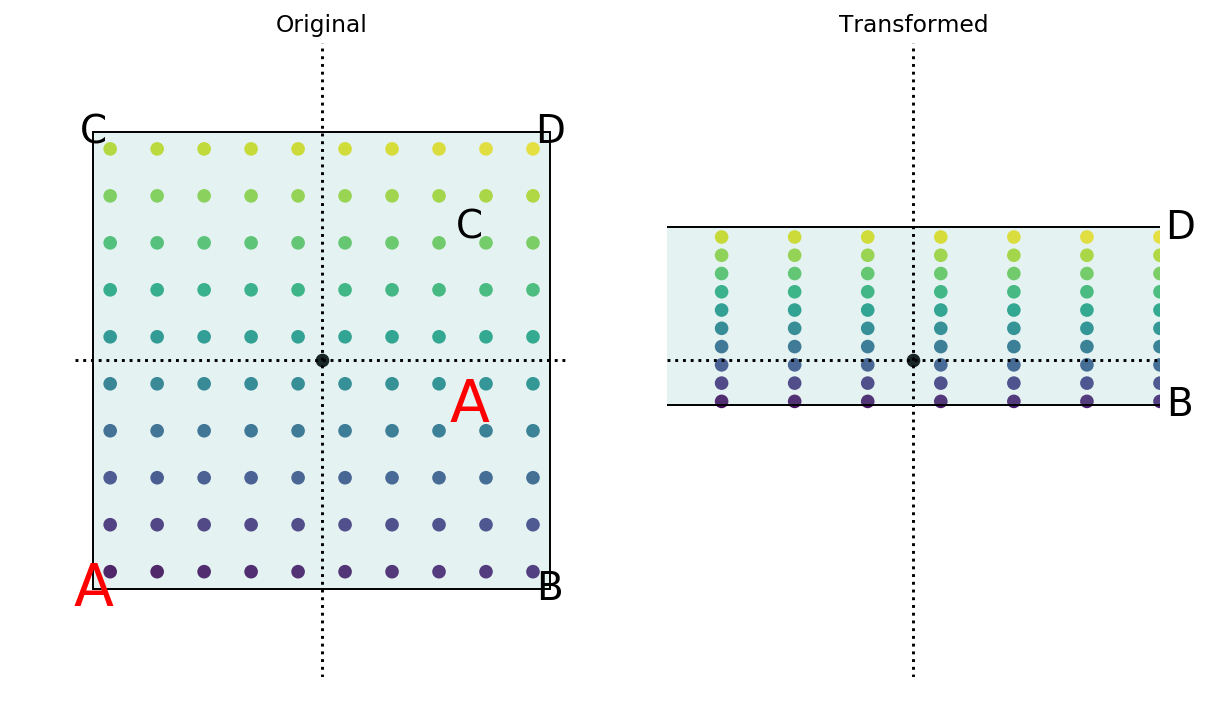

In [13]:
# show the effect visually
show_matrix_effect(Ap)

Homogeneous coordinates are widely used in computer graphics (e.g. a GPU has special operations for 4x4 matrices so that it can perform homogeneous transforms on 3D points). 

The same concept is also used in machine learning, where a **bias term** is used to allow a linear map to "move away" from the origin. Instead of awkwardly adding a vector to the transformation, the whole operation can be expressed as a single matrix multiplication using homogeneous coordinates.